In [160]:
import pandas as pd
import matplotlib.pyplot as plt 
from langdetect import detect
import numpy as np


In [161]:

# Créer un exmple de dictionnaire
dictionary = {
    'name1': (5, 'date1', "It is so bad"),
    'name2': (4, 'date2', 'it sucks'),
    'name3': (3, 'date2', "It's okay"),
    'name4': (5, 'date2', 'It is very good'),
    'name5': (5, 'date2', "c'est un peu nul"),
    'name6': (5, 'date2', "Le robot est très bon"),
    'name7': (5, 'date2', "The robot is very good"),
    'name8': (5, 'date2', "El robot es muy bueno"),
    'name9': (5, 'date2', "Il robot è molto buono"),
}
df = pd.DataFrame(dictionary, index=['grading', 'date', 'Text']).T

In [162]:
# Convertir le dictionnaire en DataFrame

df = pd.read_csv('data.csv', sep=',')
df = df.dropna()
# Remplacer les valeurs dans grading par des int
df["grading"] = df["grading"].replace("1 star", 1)
df["grading"] = df["grading"].replace("2 stars", 2)
df["grading"] = df["grading"].replace("3 stars", 3)
df["grading"] = df["grading"].replace("4 stars", 4)
df["grading"] = df["grading"].replace("5 stars", 5)
df.index_name = 'ID'
# Renommer la colonne d'index en "ID"
df = df.rename_axis('ID').reset_index()
df.set_index('ID', inplace=True)
# Ajouter la colonne Language à la DataFrame
df['Language'] = df['Text'].apply(detect)
df

,Name,grading,date,Text,Language
ID,,,,,
0,Gregory Cowgill,4,2 weeks ago,"Great food, great service, friendly staff. How...",en
1,lonelyjoe,5,5 years ago,The interior is neat and modern.\nIt is spacio...,en
2,Taesung Hwang,4,a month ago,Large dining hall with numerous food options t...,en
3,Busta,4,a year ago,I've been eating here as a student for a lil m...,en
4,Elena Melena,4,a year ago,"Sometimes the food is nasty, but the cheesebur...",en
5,Curtis Masa,3,a year ago,"I ain't finna lie, the food was gas af the fir...",en
6,Vince Lu,5,3 years ago,"The Anteatery is kind of far for me, but the t...",en
7,Emily Faith Cabrera Jackson,1,4 years ago,The food is absolutely horrible. Onions and ga...,en
8,Jinsmr 金糖伍,5,a year ago,This is a dining hall buffet style with a lot ...,en


## EDA

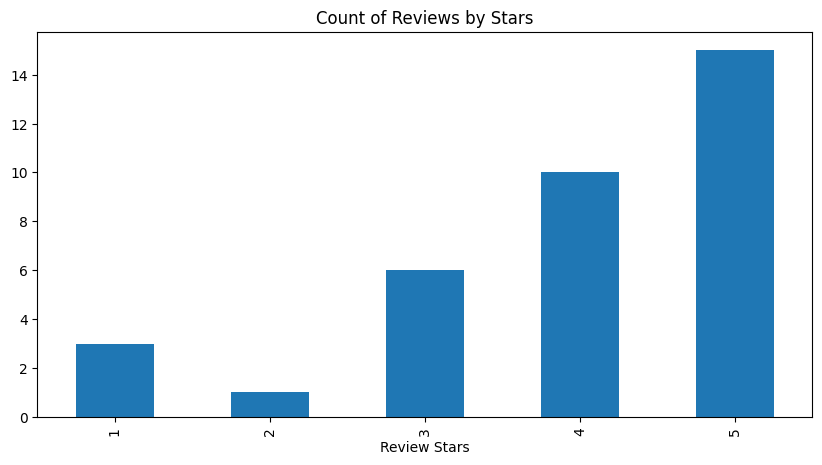

In [163]:
ax = df['grading'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Sentiment Analysis

### Roberta

In [164]:
from transformers import pipeline

In [165]:
# Sentiment Analysis with Roberta

nlp = pipeline("sentiment-analysis", model=f"cardiffnlp/twitter-roberta-base-sentiment")

# Run the polarity score on the entire dataset
res = pd.DataFrame(columns=['label', 'score'])
for index, row in df.iterrows():
    text = row['Text']
    langue = row['Language']
    if langue == 'en':
        dict = pd.DataFrame(nlp(text))
        dict['ID'] = index
        res = pd.concat([res, dict], axis=0)

# Remplacement des valeurs
res['label'] = res['label'].replace('LABEL_0', 'NEGATIVE')
res['label'] = res['label'].replace('LABEL_1', 'NEUTRAL')
res['label'] = res['label'].replace('LABEL_2', 'POSITIVE')
res["ID"] = res['ID'].astype(int)
res = res.rename(columns={"label": "label (roberta)", "score": "score (roberta)"})
res.set_index('ID', inplace=True)

# Merge the two dataframes
df = df.merge(res, left_index=True, right_index=True, how='left')
df



,Name,grading,date,Text,Language,label (roberta),score (roberta)
ID,,,,,,,
0,Gregory Cowgill,4,2 weeks ago,"Great food, great service, friendly staff. How...",en,POSITIVE,0.916955
1,lonelyjoe,5,5 years ago,The interior is neat and modern.\nIt is spacio...,en,POSITIVE,0.977490
2,Taesung Hwang,4,a month ago,Large dining hall with numerous food options t...,en,POSITIVE,0.877322
3,Busta,4,a year ago,I've been eating here as a student for a lil m...,en,POSITIVE,0.532153
4,Elena Melena,4,a year ago,"Sometimes the food is nasty, but the cheesebur...",en,POSITIVE,0.916983
5,Curtis Masa,3,a year ago,"I ain't finna lie, the food was gas af the fir...",en,POSITIVE,0.436494
6,Vince Lu,5,3 years ago,"The Anteatery is kind of far for me, but the t...",en,NEUTRAL,0.635008
7,Emily Faith Cabrera Jackson,1,4 years ago,The food is absolutely horrible. Onions and ga...,en,NEGATIVE,0.878356
8,Jinsmr 金糖伍,5,a year ago,This is a dining hall buffet style with a lot ...,en,POSITIVE,0.989077


### Kaludi/Reviews-Sentiment-Analysis

In [166]:
# Pas de neutral dans le modèle Kaludi
# Ce modèle n'est pas très connu et j'ai pas l'impression qu'il soit très performant
nlp = pipeline("sentiment-analysis", model=f"Kaludi/Reviews-Sentiment-Analysis")

# Run the polarity score on the entire dataset
res = pd.DataFrame(columns=['label', 'score'])
for index, row in df.iterrows():
    text = row['Text']
    langue = row['Language']
    if langue == 'en':
        dict = pd.DataFrame(nlp(text))
        dict['ID'] = index
        res = pd.concat([res, dict], axis=0)

# Remplacement des valeurs
res["ID"] = res['ID'].astype(int)
res = res.rename(columns={"label": "label (rev)", "score": "score (rev)"})
res.set_index('ID', inplace=True)

# Merge the two dataframes
df = df.merge(res, left_index=True, right_index=True, how='left')
df


,Name,grading,date,Text,Language,label (roberta),score (roberta),label (rev),score (rev)
ID,,,,,,,,,
0,Gregory Cowgill,4,2 weeks ago,"Great food, great service, friendly staff. How...",en,POSITIVE,0.916955,Positive,0.987111
1,lonelyjoe,5,5 years ago,The interior is neat and modern.\nIt is spacio...,en,POSITIVE,0.977490,Positive,0.991645
2,Taesung Hwang,4,a month ago,Large dining hall with numerous food options t...,en,POSITIVE,0.877322,Positive,0.989921
3,Busta,4,a year ago,I've been eating here as a student for a lil m...,en,POSITIVE,0.532153,Positive,0.987062
4,Elena Melena,4,a year ago,"Sometimes the food is nasty, but the cheesebur...",en,POSITIVE,0.916983,Positive,0.987900
5,Curtis Masa,3,a year ago,"I ain't finna lie, the food was gas af the fir...",en,POSITIVE,0.436494,Positive,0.985467
6,Vince Lu,5,3 years ago,"The Anteatery is kind of far for me, but the t...",en,NEUTRAL,0.635008,Positive,0.978794
7,Emily Faith Cabrera Jackson,1,4 years ago,The food is absolutely horrible. Onions and ga...,en,NEGATIVE,0.878356,Negative,0.992421
8,Jinsmr 金糖伍,5,a year ago,This is a dining hall buffet style with a lot ...,en,POSITIVE,0.989077,Positive,0.994038


## nlptown/bert-base-multilingual-uncased-sentiment

In [167]:
# Sentiment Analysis Bert-base-uncased
# Plusieurs langages disponibles (dont le français)
#English	150k
#Dutch	80k
#German	137k
#French	140k
#Italian	72k
#Spanish
# Il classifie les phrases en étoiles (1 à 5)
# Ce modèle est connu

nlp = pipeline("sentiment-analysis", model=f"nlptown/bert-base-multilingual-uncased-sentiment")

# Run the polarity score on the entire dataset
res = pd.DataFrame(columns=['label', 'score'])
for index, row in df.iterrows():
    text = row['Text']
    langue = row['Language']
    if langue == 'en' or langue == 'fr' or langue == 'es' or langue == 'it' or langue == 'de' or langue == 'nl':
        dict = pd.DataFrame(nlp(text))
        dict['ID'] = index
        res = pd.concat([res, dict], axis=0)

# Remplacement des valeurs
res['label'] = res['label'].replace('1 star', int(1))
res['label'] = res['label'].replace('2 stars', int(2))
res['label'] = res['label'].replace('3 stars', int(3))
res['label'] = res['label'].replace('4 stars', int(4))
res['label'] = res['label'].replace('5 stars', int(5))
res["ID"] = res['ID'].astype(int)
res = res.rename(columns={"label": "label (Bert), over 5", "score": "score (Bert)"})
res.set_index('ID', inplace=True)

# Merge the two dataframes
df = df.merge(res, left_index=True, right_index=True, how='left')
df


,Name,grading,date,Text,Language,label (roberta),score (roberta),label (rev),score (rev),"label (Bert), over 5",score (Bert)
ID,,,,,,,,,,,
0,Gregory Cowgill,4,2 weeks ago,"Great food, great service, friendly staff. How...",en,POSITIVE,0.916955,Positive,0.987111,4.0,0.596449
1,lonelyjoe,5,5 years ago,The interior is neat and modern.\nIt is spacio...,en,POSITIVE,0.977490,Positive,0.991645,4.0,0.555962
2,Taesung Hwang,4,a month ago,Large dining hall with numerous food options t...,en,POSITIVE,0.877322,Positive,0.989921,4.0,0.517915
3,Busta,4,a year ago,I've been eating here as a student for a lil m...,en,POSITIVE,0.532153,Positive,0.987062,4.0,0.342889
4,Elena Melena,4,a year ago,"Sometimes the food is nasty, but the cheesebur...",en,POSITIVE,0.916983,Positive,0.987900,4.0,0.477399
5,Curtis Masa,3,a year ago,"I ain't finna lie, the food was gas af the fir...",en,POSITIVE,0.436494,Positive,0.985467,3.0,0.515253
6,Vince Lu,5,3 years ago,"The Anteatery is kind of far for me, but the t...",en,NEUTRAL,0.635008,Positive,0.978794,3.0,0.606703
7,Emily Faith Cabrera Jackson,1,4 years ago,The food is absolutely horrible. Onions and ga...,en,NEGATIVE,0.878356,Negative,0.992421,1.0,0.873496
8,Jinsmr 金糖伍,5,a year ago,This is a dining hall buffet style with a lot ...,en,POSITIVE,0.989077,Positive,0.994038,5.0,0.511039


## Comparaison des modèles